
# Week 9 Neural Networks
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 11 Lab - CNNs!

Here's an outline of the lab:

     1) CNNs applied to MNIST

     2) CNNs applied to MNIST Fashion 




**Tips to get the most out of this tutorial:**
1. Make sure you carefully read and understand how the example code works.  
2. Try your best before looking at the hidden solutions








Once you get to the later part of the lab, try switching back to the None option to see what the hit in performance looks like!

# CNNs applied to MNIST

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

# Get training and test datasets
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Define some constants and hyperparameters for later use

In [ ]:
# CONSTANTS
NUM_CLASSES = 10
IMG_SIZE = (28, 28)

# HYPERPARAMETERS
BATCH_SIZE = 100
EPOCHS = 3

Change our image format to be either channels first or channels last

In [ ]:
# Process dataset
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, IMG_SIZE[0], IMG_SIZE[1])
    x_val = x_val.reshape(x_val.shape[0], 1, IMG_SIZE[0], IMG_SIZE[1])
    INPUT_SHAPE = (1, IMG_SIZE[0], IMG_SIZE[1])
else:
    x_train = x_train.reshape(x_train.shape[0], IMG_SIZE[0], IMG_SIZE[1], 1)
    x_val = x_val.reshape(x_val.shape[0], IMG_SIZE[0], IMG_SIZE[1], 1)
    INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 1)

In [ ]:
print('Convert features to float')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

Convert features to float


Each pixel has R,G, and B values ranging from 0-255
---
TODO: In the cell below _normalize the pixel values_ so they are all between 0 and 1

In [ ]:
# Normalize features
x_train /= ???
x_val /= ???

SyntaxError: ignored

In [ ]:
#@title
print('Normalize features')
x_train /= 255
x_val /= 255

Normalize features


In [ ]:
print('Convert labels to one-hot')
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)

print(f'Loaded { x_train.shape[0] } training samples and { x_val.shape[0] } test samples')

Convert labels to one-hot
Loaded 60000 training samples and 10000 test samples


## Building our model
---

We are using a model with the following layers:

> CONV | 32 kernels sized 3x3 | stride of 2
>
> CONV | 64 kernels sized 3x3 | stride of 2
>
> Flatten
>
> Dense | 128 output nodes
>
> Dense | Same number of output nodes as amount of classes

---

TODO: Fill in the values for each layer below

In [ ]:
# Create model
model = Sequential()

model.add(Conv2D(filters=???, kernel_size=(???, ???), strides=???, activation='relu', input_shape=INPUT_SHAPE))
model.add(Conv2D(filters=???, kernel_size=(???, ???), strides=???, activation='relu'))
model.add(Flatten())
model.add(Dense(units=???, activation='relu'))
model.add(Dense(units=???, activation='softmax'))

SyntaxError: ignored

In [ ]:
#@title
# Create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=2, activation='relu', input_shape=INPUT_SHAPE))
model.add(Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_val, y_val))

score = model.evaluate(x_val, y_val, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
600/600 [==============================] - 34s 7ms/step - loss: 0.4675 - accuracy: 0.8638 - val_loss: 0.0737 - val_accuracy: 0.9781
Epoch 2/3
600/600 [==============================] - 4s 6ms/step - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.0560 - val_accuracy: 0.9826
Epoch 3/3
600/600 [==============================] - 4s 6ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0421 - val_accuracy: 0.9856
Test loss: 0.04206118732690811
Test accuracy: 0.9855999946594238


## Evaluating our model
---
Now that our model is trained (it should have around 98% accuracy) we can check out how well it does.

We will first plot out some random images from the validation set and the prediction the model gives them

Predicted 9


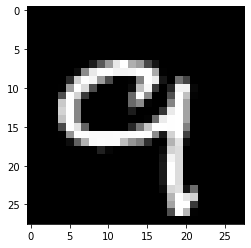

Predicted 0


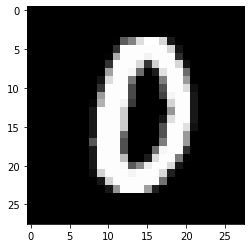

Predicted 1


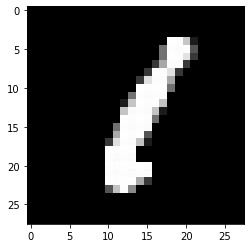

Predicted 1


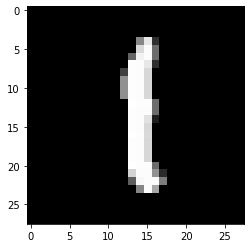

Predicted 0


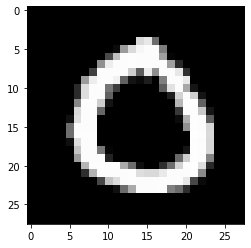

In [ ]:
num_examples = 5
indices = np.random.randint(0, x_val.shape[0] - 1, (num_examples,))
examples = x_val[indices].reshape((num_examples, *INPUT_SHAPE))
predictions = model.predict(examples)

for i, pred in enumerate(predictions):
    print(f'Predicted { pred.argmax() }')
    plt.imshow(x_val[indices[i]].reshape((*IMG_SIZE)), cmap='gray')
    plt.show()

Now we are going to try and find some images from our validation set that our model incorrectly classified

Predicted 9 | Label 4


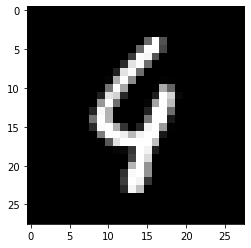

Predicted 2 | Label 4


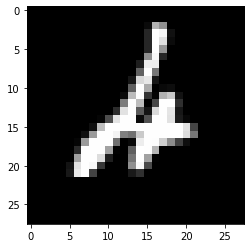

Predicted 7 | Label 2


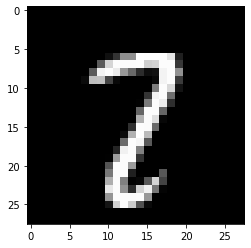

Predicted 1 | Label 2


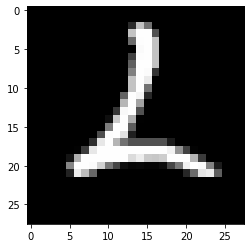

Predicted 7 | Label 3


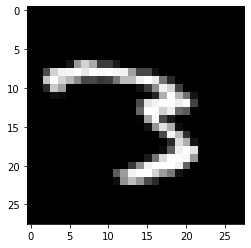

In [ ]:
num_wrong_examples = 5
num_shown_examples = 0

for i, x in enumerate(x_val):
    prediction = model.predict(x.reshape((1, *INPUT_SHAPE)))

    if (prediction.argmax() != y_val[i].argmax()):
        print(f'Predicted { prediction.argmax() } | Label { y_val[i].argmax() }')
        plt.imshow(x.reshape((*IMG_SIZE)), cmap='gray')
        plt.show()
        num_shown_examples += 1

    if (num_shown_examples >= num_wrong_examples):
        break

Can we really blame our model for getting these wrong?

# CNNs for the MNIST Fashion Dataset

We'll be using Keras again, and a dataset built right into the library: The Fashion MNIST dataset

This is a dataset containing 70,000 grayscale images, 28x28 in resolution, of various fashion items (shoes, shirts, etc). There are 10 total categories.

This part of the lab will utilize some concepts we only briefly touched on in lecture, and didn't dive into the details of: namely dropout, and max pooling layers. Max pooling can be thought of as a nice dimensionality reducing trick to take high dimensional data (e.g. after we've gone through a convolutional layer with our data) and compressing it down to a lower dimension. Check out this excellent video for more on the subject: https://www.youtube.com/watch?time_continue=239&v=ZjM_XQa5s6s&feature=emb_logo

Dropout, is simply a way to reduce overfitting, and the key idea is to randomly make certain weights 0 in the network, completely negating the impact of multiple neurons in the net. This forces the network to not rely too heavily on a single neuron, or try to 'memorize' input. For more, check out this video: https://www.youtube.com/watch?v=vAVOY8frLlQ


Onto the lab!

In [ ]:
#Loading our data

from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Data Analysis / Manipulation

Lets take a look at the size/shape of our data:

In [ ]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Now lets see what one of these images looks like!

Text(0.5, 1.0, 'Ground Truth : 9')

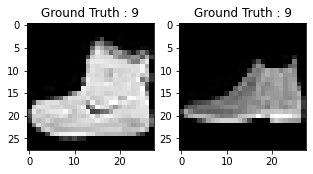

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Now, convert the datasets so that each datapoint is not (28, 28), but (28, 28, 1) in dimension (this is an annoying formality often needed to run the data through the network). Hint: Use the reshape() method

In [ ]:
train_X = 
test_X = 
train_X.shape, test_X.shape

In [ ]:
#@title Solution
train_X = train_X.reshape(-1, 28,28, 1) # -1 allows for any number in that spot 
test_X = test_X.reshape(-1, 28,28, 1) # In this case, 60,000 and 10,000
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The value of each pixel is an integer, so lets convert to floats and scale so each pixel ranges between 0 and 1

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Now we'll convert our train_Y and test_Y values to be 'one hot encoded vectors', which is fancy terminology for a vector filled with all 0's and one 1. E.g if you want to represent a label of 3, then your vector would be [0 0 1 0 0 0 0 0 0 0]

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Now lets split our current train data into training and validation. Use train_test_split to do an 80/20 split:

In [ ]:
from sklearn.model_selection import train_test_split

train_X,valid_X,train_label,valid_label = 

SyntaxError: ignored

In [ ]:
#@title Solution
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

## Training & Testing

We'll use 3 convolutional layers. The first will have 32 3x3 filteres (aka Kernels), the second will have 64 3x3 filteres, and the third will have 128 3x3 filters. We'll also have 3 max pooling layers.

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20
num_classes = 10

Now to add the layers. You'll notice we use a 'Leaky ReLu' function. This is used to avoid ReLu completely destroying a neuron's value if it is too small (e.g. plugging in -.2 do ReLu outputs 0).

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In reality, finding the right activation functions, number of layers, etc for your network is quite difficult. There is a whole area of research on this called hyperparameter optimization, as being able to automate this process would be very nice!




Now we'll put the model together with the Adam optimizer, which is one of the most widely used optimizers for DNNs. 

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam())

Lastly, lets train the model using the fit() method.

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0188 - val_loss: 0.6157
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0173 - val_loss: 0.6101
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0252 - val_loss: 0.5711
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0178 - val_loss: 0.5842
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0180 - val_loss: 0.6215
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0239 - val_loss: 0.5888
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0133 - val_loss: 0.6490
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0175 - val_loss: 0.6716
Epoch 9/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0158 - val_loss: 0.7432
Epoch 10/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0167 - val_loss: 0.6316

In [ ]:
print(fashion_model.evaluate(valid_X, valid_label))

375/375 [==============================] - 1s 3ms/step - loss: 0.6905
0.6905326247215271


We can see that our model chooses the right classification about 70% of the time. For a first attempt, this is not bad since there are 10 classes to choose from, however there is much more room for improvement.

If you are interested, check out the link below, which goes to the lab that this one is based off of, and follow the instructions to implement dropout. This should allow you to achieve higher overall accuracy in the model.

#References

Lab in part developed for the LearnAI 2020-2021 academic year cohort (University of Toronto AI Club)

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python